<h3>Import necessary libraries</h3>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
import keras
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense
from keras._tf_keras.keras.applications import ResNet50
from keras._tf_keras.keras.applications.resnet50 import preprocess_input
from keras._tf_keras.keras.applications import VGG16


<h3>Get the image</h3>

In [3]:
negative_images = os.listdir('./Negative')
negative_images
positive_images=os.listdir('./Positive')
positive=['./Positive/{}'.format(image) for image in positive_images]
pos=len(positive)


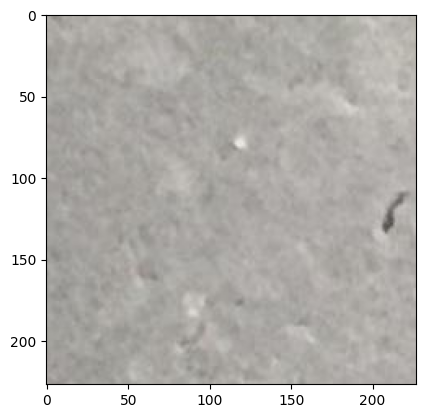

In [4]:
image_data=Image.open('./Negative/{}'.format(negative_images[0]))
plt.imshow(image_data)

In [5]:
negative=['./Negative/{}'.format(image)for image in negative_images]
Length=len(negative)

<h3>Generate Normalized data from image using ImageGenerator</h3>

In [6]:
data_directory='./concrete_data_week2'

In [7]:
data_generator=ImageDataGenerator(rescale=1./255)
image_generator=data_generator.flow_from_directory(data_directory,batch_size=4,class_mode='categorical',seed=24)
first_batch=image_generator.next()[0]
second_batch=image_generator.next()[0]
third_batch=image_generator.next()[0]
fourth_batch=image_generator.next()[0]
fifth_batch=image_generator.next()[0]

Found 40000 images belonging to 2 classes.


<h3>Visualize Batch of Images</h3>

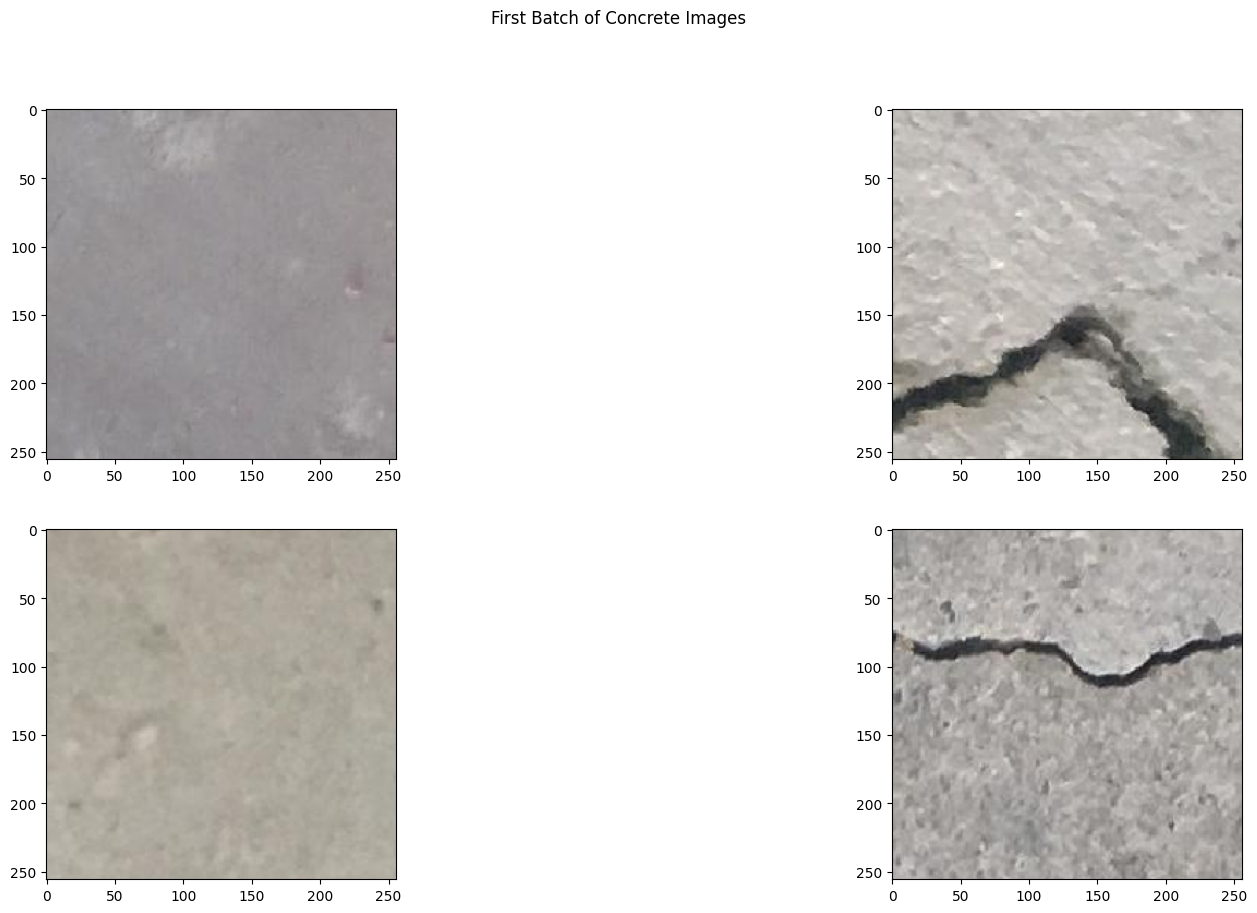

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

<h3>Build Model</h3>

In [9]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
) 


train_generator = data_generator.flow_from_directory(
    'concrete_data_week3/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')


valid_generator=data_generator.flow_from_directory('concrete_data_week3/valid',
                                                   target_size=(image_resize,image_resize),
                                                   batch_size=batch_size_validation,
                                                   class_mode='categorical')

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(valid_generator)
num_epochs = 2

Found 10001 images belonging to 2 classes.
Found 5001 images belonging to 2 classes.


In [10]:
model = Sequential()
model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))
model.add(Dense(num_classes, activation='softmax'))
model.layers[0].trainable = False #for not training the vgg part
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fit_history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)
model.save('classifier_vgg_model.keras')

Epoch 1/2
101/101 [==============================] - 1464s 15s/step - loss: 0.2251 - accuracy: 0.9212 - val_loss: 0.0942 - val_accuracy: 0.9772
Epoch 2/2
101/101 [==============================] - 1490s 15s/step - loss: 0.0534 - accuracy: 0.9900 - val_loss: 0.0554 - val_accuracy: 0.9840


In [11]:
model = Sequential()
model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))
model.add(Dense(num_classes, activation='softmax'))
model.layers[0].trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fit_resnet = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)


Epoch 1/2
 14/101 [===>..........................] - ETA: 7:19 - loss: 0.1383 - accuracy: 0.9743

KeyboardInterrupt: 